# Analysis of University of Waterloo Salaries
#### Publicaly Disclosed 2021 Figures (only salaries above $100,000)
### By: Nick Tiliakos

In [447]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import plotly.express as px
from scipy.stats import iqr

In [448]:
data = pd.read_csv('/Users/NickT/Documents/Projects/Datasets/UW_Sal_Dis_2021 - Sheet1.csv')
df = pd.DataFrame(data)

In [449]:
df.head()

,Surname,Given name,Position title,Salary paid,Taxable Benefits
0,AAFER,YOUSRA,Assistant Professor,"154,146.48",166.92
1,AAGAARD,MARK,Associate Professor,"144,188.61",399.51
2,ABDEL-RAHMAN,EIHAB,Professor,"206,339.68",228.04
3,ABEDI,ALI,Lecturer,"106,701.64",289.04
4,ABEYWARDENA,ISHAN S.,"Associate Director, Systems","130,083.13",352.16


In [450]:
df.describe()

,Taxable Benefits
count,1856.000000
mean,312.776972
std,351.079040
min,0.000000
25%,164.390000
50%,274.720000
75%,429.945000
max,10482.520000


In [451]:
df.dtypes

Surname              object
Given name           object
Position title       object
Salary paid          object
Taxable Benefits    float64
dtype: object

In [452]:
print(df.shape)

(1856, 5)


## Basic data cleaning 

Since this dataset is an official salary disclosure and the source was the University of Waterloo directly, the data is already fairly clean (ie. no missing data, etc.). Thus, the cleaning that needs to be done will consist of renaming columns and changing data types. 

### Changing some column names

In [453]:
for col in df.columns:
    print(col)

Surname
Given name
Position title
Salary paid
Taxable Benefits


In [454]:
df = df.rename(columns = {'Given name': 'First Name'})
df = df.rename(columns = {'Salary paid': 'Salary'})
df = df.rename(columns = {'Position title': 'Position Title'})

In [455]:
# Delete commas from salary column
df['Salary'] = df['Salary'].apply(lambda x: x.replace(',', ''))

In [456]:
# Convert Salary column from string to numeric values 
df['Salary'] = df['Salary'].apply(pd.to_numeric)

In [457]:
df.dtypes

Surname              object
First Name           object
Position Title       object
Salary              float64
Taxable Benefits    float64
dtype: object

## Exploration of the data

For comparison's sake, here are the average earning figures of  Canadians, before taxes:
- The average salary of a Canadian federal employee is $79,206. (1)
- The average salary of a Canadian worker is $55,522. (2)

Sources: (1) payscale.com, (2) glassdoor.ca

### Salary Information

In [458]:
# Maximum salary

max_sal = df.loc[df['Salary'].idxmax()]
print(max_sal)

Surname                    HAMDULLAHPUR
First Name                      FERIDUN
Position Title      President;;Emeritus
Salary                           475761
Taxable Benefits                 548.16
Name: 655, dtype: object


The highest salary was $475,761.11 and it was paid to the (then) President, Hamdullahpur Feridun. 
<br>
<br>
This is roughly 601% higher than the national average for a federal employee, and 857% higher than the average Canadian worker.

In [459]:
# Minumum salary

min_sal = df.loc[df['Salary'].idxmin()]
print(min_sal)

Surname                                         DONOHUE
First Name                                      JOHN M.
Position Title      Senior Manager, Scientific Outreach
Salary                                           100000
Taxable Benefits                                  115.8
Name: 415, dtype: object


The lowest salary was $100,000.08 and it was paid to the Senior Manager of Scientific Outreach, John M. Donohue.
<br>
<br>
This is roughly 126% higher than the national average for a federal employee, and 180% higher than the aberage Canadian worker.

In [460]:
# Average & median salary

avg_sal = round(df.Salary.mean(), 2)
med_sal = round(df.Salary.median(), 2)
print("Average salary: ", avg_sal)
print("Median salary: ", med_sal)

Average salary:  158976.28
Median salary:  151143.82


The average salary of University of Waterloo employees is $158,976.28. 
<br>
<br>
This is roughly 201% higher than federal employees and 286% higher than the average Canadian worker.

In [461]:
# Salary range
mxm = df.Salary.max()
minm = df.Salary.min()

sal_range = round(mxm - minm, 2)

print("The salaries have a range of $", sal_range)

The salaries have a range of $ 375761.03


#### Interquartile Range

The IQR measures the spread of the middle half of your data. It is the difference between the 75th and 25th percentiles of the salaries. 

In [462]:
iqr_sal = iqr(df['Salary'])
print('The interquartile range is: ', round(iqr_sal, 2))

The interquartile range is:  72647.57


In [463]:
# New dataframe consisting of only teaching staff with the titles 
# Lecturer, Professor, Associate Professor, Researcher, Instructor or similar.
df_profs = df[df['Position Title'].str.contains('Lecturer|Professor|Research|Instructor')]
df_profs.shape

(1356, 5)

Of the 1856 staff that make $100,000 or above, 1356 are primarily teaching staff, with titles including Researcher, Lecturer, Professor, Associate Professor, Instructor or similar.

In [464]:
# Non-teaching staff dataframe
df_nt = pd.concat([df, df_profs, df_profs]).drop_duplicates(keep=False)
df_nt.head()

,Surname,First Name,Position Title,Salary,Taxable Benefits
4,ABEYWARDENA,ISHAN S.,"Associate Director, Systems",130083.13,352.16
14,AGER,SHEILA L.,"Dean, Arts",258870.68,265.20
19,ALARCO,JAVIER A.,Executive Chef,101792.08,117.84
20,ALDWINCKLE,DAVID,Network Support Specialist,121820.62,134.84
21,ALEKBEROV,ELSHAN,Business Manager,107366.12,93.96


### Visualization of data

#### Histogram to Show Distribution

In [465]:
px.histogram(df.Salary, x='Salary',
             color_discrete_sequence=['darkgreen'],
             title = 'Overall Salary Distribution', nbins=120)

As we can see from the plot above, the majority of salaries fall in the `$100,000 to $227,500` range. 

#### Teaching vs Non-Teaching Staff Salaries


Text(0.5, 1.0, 'Teaching vs Non-Teaching Staff Salaries')

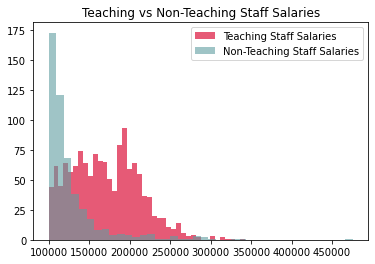

In [466]:
plt.hist(df_profs['Salary'], alpha=0.7,
         label='Teaching Staff Salaries', color='crimson', bins=40)
plt.hist(df_nt['Salary'], alpha=0.6,
         label='Non-Teaching Staff Salaries', color='cadetblue', bins=40)

plt.legend(loc='upper right')
plt.title('Teaching vs Non-Teaching Staff Salaries')

In [467]:
prof_avg = round(df_profs.Salary.mean(), 2)
prof_std = round(df_profs['Salary'].std(), 2)
iqr_profs = iqr(df_profs['Salary'])
nt_avg = round(df_nt.Salary.mean(), 2)
nt_std = round(df_nt['Salary'].std(), 2)
iqr_nt = round(iqr(df_nt['Salary']), 2)

print("Teaching Staff Average Salary: ", avg_sal)
print("Teaching Staff Standard Deviation:", prof_std)
print('Teaching Staff Interquartile Range: ', iqr_profs)
print()
print("Non-Teaching Staff Average Salary: ", nt_avg)
print("Non-Teaching Staff Standard Deviation:", nt_std)
print('Non-Teaching Staff Interquartile Range: ', iqr_nt)

Teaching Staff Average Salary:  158976.28
Teaching Staff Standard Deviation: 41849.27
Teaching Staff Interquartile Range:  62425.31

Non-Teaching Staff Average Salary:  127680.77
Non-Teaching Staff Standard Deviation: 39683.55
Non-Teaching Staff Interquartile Range:  24077.25


The standard deviation of the teaching and non-teaching staff is somewhat similar. <br>
However, the interquartile range is very different. This means that salaries for teaching staff is far more spread out than those for non-teaching staff, and as we can see from the $30,000+ difference in the average salary, that spreading out is mostly in the higher figures.

## Predictive Modeling for Salary Determination

In [468]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Splitting Data into Training and Testing Sets

#### Building and Training the Model